In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [180]:
# Baselines


# Load random algorithm data of Netlist 3
random_nl3_costs = []
random_nl3_runtimes = []
random_nl3_states = []

file = open("results/random_costs03.txt", "r")
for line in file:
    line = line.split(',')
    random_nl3_costs.append(int(line[0]))
    random_nl3_runtimes.append(float(line[1]))
    random_nl3_states.append(int(line[2]))
file.close()


# Load Manhattan data of netlist 3
manhattan_nl3_runtimes = []

file = open("results/manhattan_costs03.txt", "r")
for line in file:
    line = line.split(',')
    manhattan_nl3_cost = int(line[0])
    manhattan_nl3_runtimes.append(float(line[1]))
    manhattan_nl3_states = int(line[2])
file.close()
                           

# Load Manhattan data of netlit 4
                           
manhattan_nl4_runtimes = []

file = open("results/manhattan_costs14.txt", "r")
for line in file:
    line = line.split(',')
    manhattan_nl4_cost = int(line[0])
    manhattan_nl4_runtimes.append(float(line[1]))
    manhattan_nl4_states = int(line[2])
file.close()

In [195]:
# Load Greedy data of netlist 3

greedy_nl3_runtimes = []

file = open("results/greedy_costs03.txt", "r")
for line in file:
    line = line.split(',')
    greedy_nl3_cost = int(line[0])
    greedy_nl3_runtimes.append(float(line[1]))
    greedy_nl3_states = int(line[2])
file.close()


# Load Greedy data for netlist 4
greedy_nl4_runtimes = []

file = open("results/greedy_costs14.txt", "r")
for line in file:
    line = line.split(',')
    greedy_nl4_cost = int(line[0])
    greedy_nl4_runtimes.append(float(line[1]))
    greedy_nl4_states = int(line[2])

file.close()

# Load random greedy data of Netlist 3
r_greedy_nl3_costs = []
r_greedy_nl3_runtimes = []
r_greedy_nl3_states = []

file = open("results/random_greedy_costs03.txt", "r")
for line in file:
    line = line.split(',')
    r_greedy_nl3_costs.append(int(line[0]))
    r_greedy_nl3_runtimes.append(float(line[1]))
    r_greedy_nl3_states.append(int(line[2]))
file.close()

In [196]:
print(greedy_nl3_states)

58


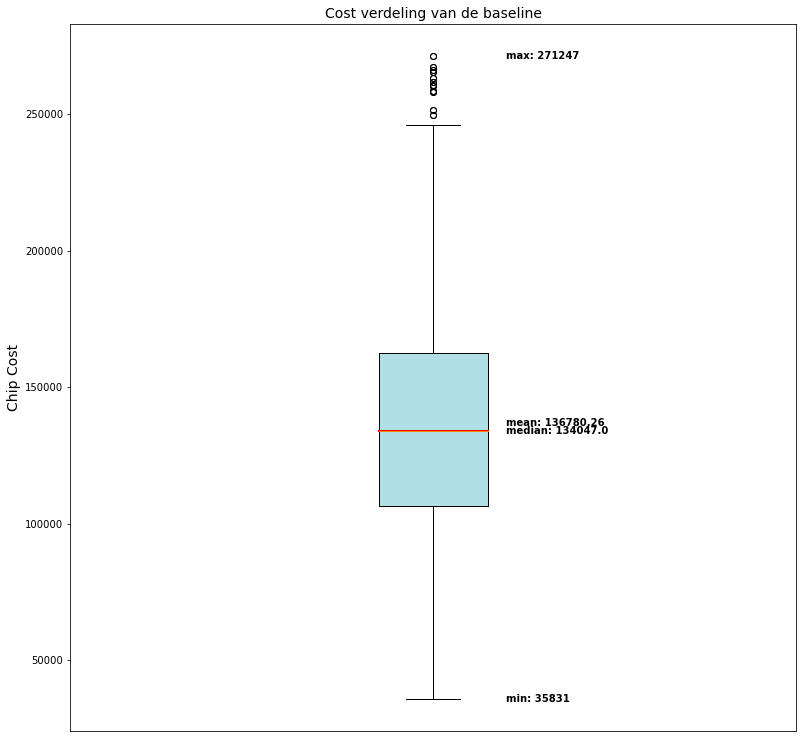

In [182]:
data = random_nl3_costs

# Maak de boxplot
fig = plt.figure(figsize=(13, 13))
fig = plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor='powderblue'), medianprops=dict(linewidth=2, color='red'))
 
# Bereken de relevante statistieken
stats = {'min': np.min(data), 'max': np.max(data), 'mean': round(np.mean(data), 2), 'median': np.median(data)}

# Voeg text annotaties toe voor de statistieken
for stat, value in stats.items():
    plt.text(1.1, value, f'{stat}: {value}', va='center', fontweight='bold')
    

# Verwijder x-as ticks en tick labels
plt.tick_params(axis='x', bottom=False, labelbottom=False)

# Voeg een titel en label toe aan de boxplot
plt.title('Cost verdeling van de baseline',fontsize=14)
plt.ylabel('Chip Cost', fontsize=14)

# Maak de plot
plt.boxplot(data)
 
plt.show()

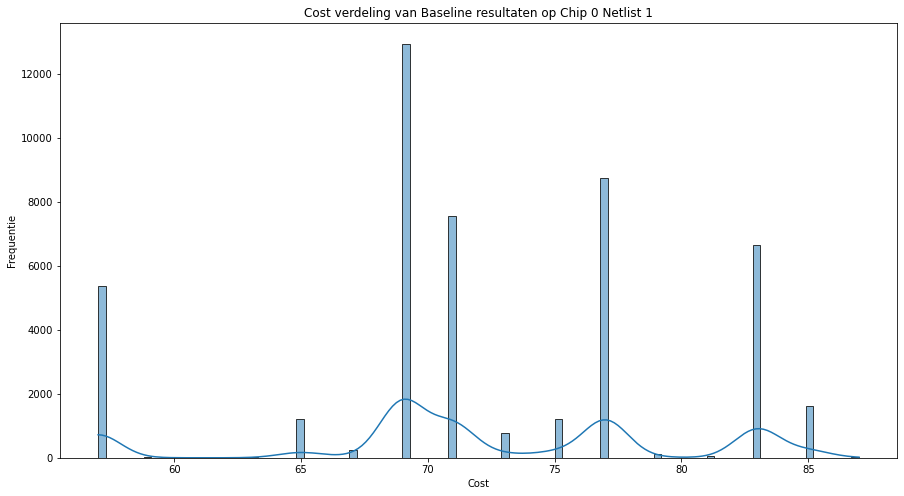

In [183]:
# Maak het histogram
plt.figure(figsize=(15,8))
sns.histplot(r_greedy_nl3_costs, kde=True, bins=100)

# Voeg labels toe
plt.xlabel('Cost')
plt.ylabel('Frequentie')
plt.title('Cost verdeling van Baseline resultaten op Chip 0 Netlist 1')

plt.show()

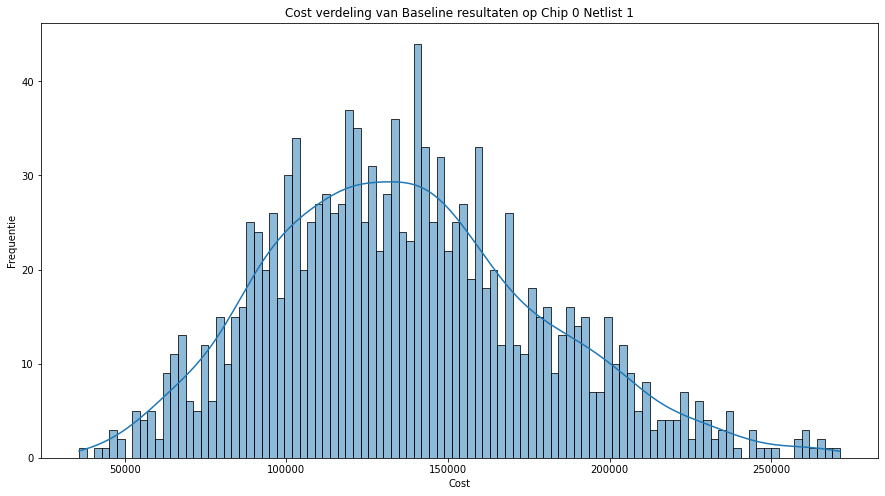

In [184]:
# Werkt niet in VSC???

# Maak het histogram
#plt.figure(figsize=(15,8))
#sns.histplot(random_nl3_costs, kde=True, bins=100)

# Voeg labels toe
#plt.xlabel('Cost')
#plt.ylabel('Frequentie')
#plt.title('Cost verdeling van Baseline resultaten op Chip 0 Netlist 1')

#plt.show()

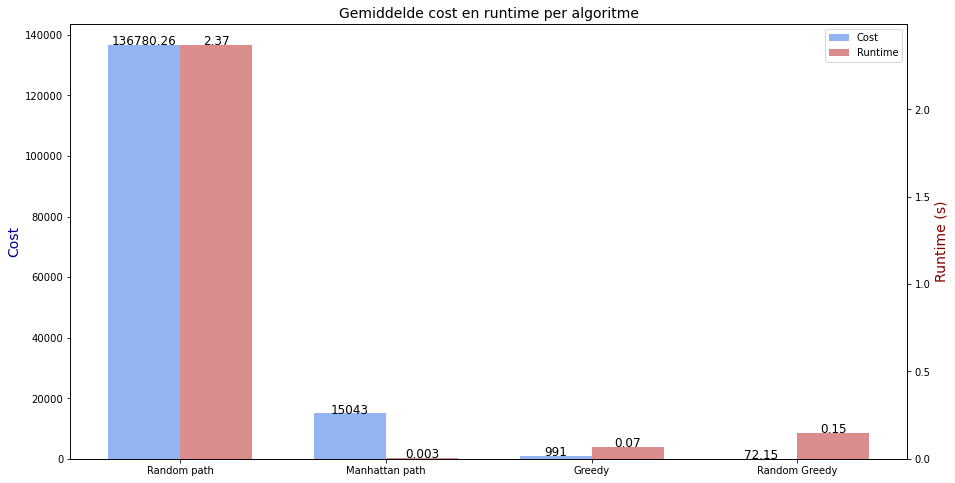

In [185]:
# Data
algorithms = ['Random path', 'Manhattan path', 'Greedy', 'Random Greedy']
cost = [round(np.mean(random_nl3_costs), 2), manhattan_nl3_cost, greedy_nl3_cost, round(np.mean(r_greedy_nl3_costs), 2)]
runtime = [round(np.mean(random_nl3_runtimes), 2), round(np.mean(manhattan_nl3_runtimes), 3), 
           round(np.mean(greedy_nl3_runtimes),2), round(np.mean(r_greedy_nl3_runtimes), 2)]

bar_width = 0.35

# Bereken x-as posities voor de bars
x = np.arange(len(algorithms))

# Maak het figuur en de assen
fig, ax1 = plt.subplots(figsize=(15,8))

# Voeg de cost staaf toe
bar1 = ax1.bar(x - bar_width/2, cost, width=bar_width, color='cornflowerblue', alpha=0.7)

# Voeg de cost y-as toe
ax1.set_ylabel('Cost', color='darkblue', fontsize=14)

# Voeg een tweede y-as toe
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (s)', color='darkred', fontsize=14)
#ax2.set_ylim([0, 100])

# Voeg de runtime staaf toe
bar2 = ax2.bar(x + bar_width/2, runtime, width=bar_width, color='indianred', alpha=0.7)


# Voeg de x-as ticks en labels toe
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)


# Schrijf de cost waardes boven de staven
for i, value in enumerate(cost):
    ax1.text(i - bar_width/2, value + 0.4, str(value), ha="center", fontsize=12)

# Schrijf de runtime waardes boven de staven
for i, value in enumerate(runtime):
    ax2.text(i + bar_width/2, value + 0.001, str(value), ha="center", fontsize=12)

    
    
# Voeg een titel en legenda toe
plt.title('Gemiddelde cost en runtime per algoritme',fontsize=14)
ax1.legend([bar1, bar2], ['Cost', 'Runtime'])

plt.show()

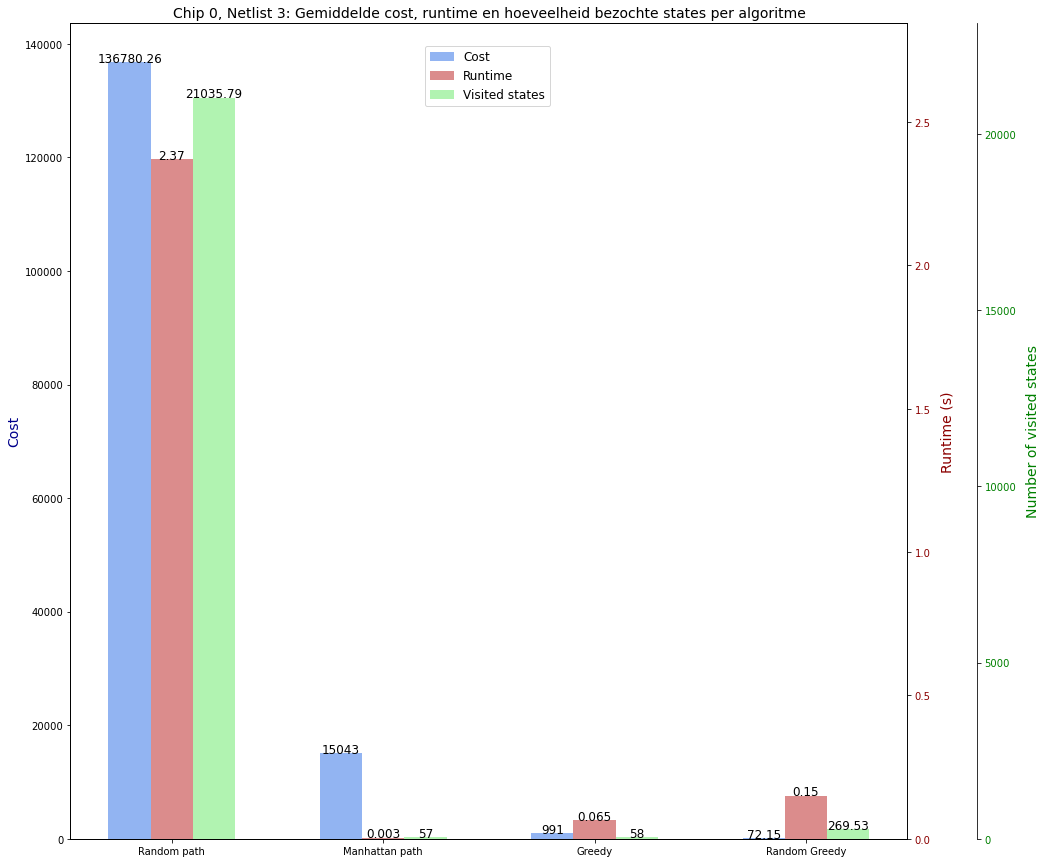

In [200]:
# Data
algorithms = ['Random path', 'Manhattan path', 'Greedy', 'Random Greedy']
cost = [round(np.mean(random_nl3_costs), 2), manhattan_nl3_cost, greedy_nl3_cost, round(np.mean(r_greedy_nl3_costs), 2)]
runtime = [round(np.mean(random_nl3_runtimes), 2), round(np.mean(manhattan_nl3_runtimes), 3), 
           round(np.mean(greedy_nl3_runtimes), 3), round(np.mean(r_greedy_nl3_runtimes), 2)]
visited_states = [round(np.mean(random_nl3_states), 2), manhattan_nl3_states, greedy_nl3_states, 
                  round(np.mean(r_greedy_nl3_states), 2)]


bar_width = 0.2

# Bereken x-as posities voor de bars
x = np.arange(len(algorithms))

fig, ax1 = plt.subplots(figsize=(15, 15))

# Voeg de cost staaf toe
bar1 = ax1.bar(x - bar_width, cost, width=bar_width, color='cornflowerblue', alpha=0.7)

# Voeg de cost y-as toe
ax1.set_ylabel('Cost', color='darkblue', fontsize=14)

# Voeg een tweede y-as toe
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (s)', color='darkred', fontsize=14, labelpad=10)
ax2.tick_params(axis='y', labelcolor='darkred')  # Set tick color for ax2

# Voeg de runtime staaf toe
bar2 = ax2.bar(x, runtime, width=bar_width, color='indianred', alpha=0.7)


# Maak ax3 naast ax2
ax3 = ax2.twinx()
ax3.spines['right'].set_position(('outward', 70))
ax3.set_ylabel('Number of visited states', color='green', fontsize=14, labelpad=10)
ax3.tick_params(axis='y', labelcolor='green')  # Set tick color for ax2

# Voeg de bezochte states data staaf toe
bar3 = ax3.bar(x + bar_width, visited_states, width=bar_width, color='lightgreen', alpha=0.7)

# Verberg de y-ticks en labels van ax3
#ax3.yaxis.set_ticks([])

# Verplaats de runtime y-ticks naar rechts
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

# Pas de y-as limieten van ax3 aan
ax2.set_ylim(0, max(runtime) * 1.2)  # Adjust the limit to show the bars
ax3.set_ylim(0, max(visited_states) * 1.1)  # Adjust the limit to show the bars

# Voeg de x-as ticks en labels toe
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)


# Schrijf de cost waardes boven de staven
for i, value in enumerate(cost):
    ax1.text(i - bar_width, value + 0.4, str(value), ha="center", fontsize=12)

# Schrijf de runtime waardes boven de staven
for i, value in enumerate(runtime):
    ax2.text(i, value + 0.001, str(value), ha="center", fontsize=12)
    
# Schrijf de visited states waardes boven de staven
for i, value in enumerate(visited_states):
    ax3.text(i + bar_width, value + 0.001, str(value), ha="center", fontsize=12)

    
# Voeg een titel en legenda toe
plt.title('Chip 0, Netlist 3: Gemiddelde cost, runtime en hoeveelheid bezochte states per algoritme', fontsize=14)
ax1.legend([bar1, bar2, bar3], ['Cost', 'Runtime', 'Visited states'], bbox_to_anchor=[0.58, 0.98], fontsize = 12)

plt.show()

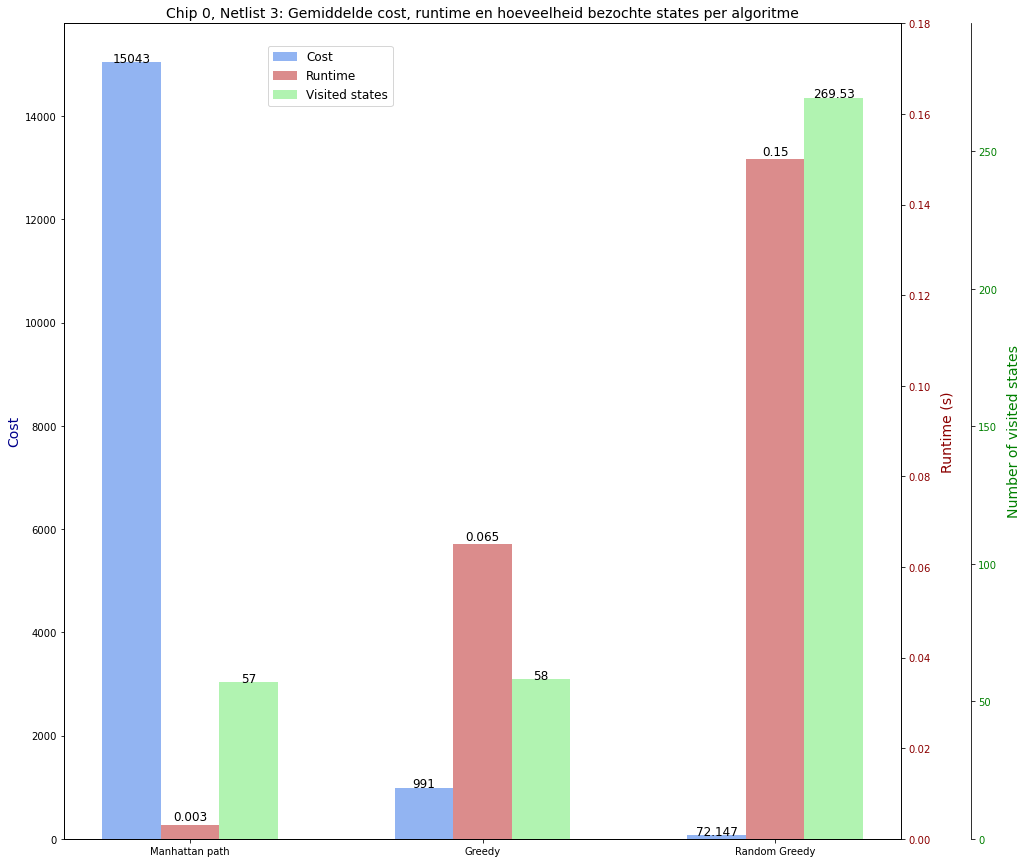

In [198]:
# Data
algorithms = ['Manhattan path', 'Greedy', 'Random Greedy']
cost = [manhattan_nl3_cost, greedy_nl3_cost, round(np.mean(r_greedy_nl3_costs), 3)]
runtime = [round(np.mean(manhattan_nl3_runtimes), 3), 
           round(np.mean(greedy_nl3_runtimes), 3), round(np.mean(r_greedy_nl3_runtimes), 2)]
visited_states = [manhattan_nl3_states, greedy_nl3_states, round(np.mean(r_greedy_nl3_states), 2)]


bar_width = 0.2

# Bereken x-as posities voor de bars
x = np.arange(len(algorithms))

fig, ax1 = plt.subplots(figsize=(15, 15))

# Voeg de cost staaf toe
bar1 = ax1.bar(x - bar_width, cost, width=bar_width, color='cornflowerblue', alpha=0.7)

# Voeg de cost y-as toe
ax1.set_ylabel('Cost', color='darkblue', fontsize=14)

# Voeg een tweede y-as toe
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (s)', color='darkred', fontsize=14, labelpad=10)
ax2.tick_params(axis='y', labelcolor='darkred')  # Set tick color for ax2

# Voeg de runtime staaf toe
bar2 = ax2.bar(x, runtime, width=bar_width, color='indianred', alpha=0.7)


# Maak ax3 naast ax2
ax3 = ax2.twinx()
ax3.spines['right'].set_position(('outward', 70))
ax3.set_ylabel('Number of visited states', color='green', fontsize=14, labelpad=10)
ax3.tick_params(axis='y', labelcolor='green')  # Set tick color for ax2

# Voeg de bezochte states data staaf toe
bar3 = ax3.bar(x + bar_width, visited_states, width=bar_width, color='lightgreen', alpha=0.7)

# Verberg de y-ticks en labels van ax3
#ax3.yaxis.set_ticks([])

# Verplaats de runtime y-ticks naar rechts
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

# Pas de y-as limieten van ax3 aan
ax2.set_ylim(0, max(runtime) * 1.2)  # Adjust the limit to show the bars
ax3.set_ylim(0, max(visited_states) * 1.1)  # Adjust the limit to show the bars

# Voeg de x-as ticks en labels toe
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)


# Schrijf de cost waardes boven de staven
for i, value in enumerate(cost):
    ax1.text(i - bar_width, value + 0.4, str(value), ha="center", fontsize=12)

# Schrijf de runtime waardes boven de staven
for i, value in enumerate(runtime):
    ax2.text(i, value + 0.001, str(value), ha="center", fontsize=12)
    
# Schrijf de visited states waardes boven de staven
for i, value in enumerate(visited_states):
    ax3.text(i + bar_width, value + 0.001, str(value), ha="center", fontsize=12)

    
# Voeg een titel en legenda toe
plt.title('Chip 0, Netlist 3: Gemiddelde cost, runtime en hoeveelheid bezochte states per algoritme', fontsize=14)
ax1.legend([bar1, bar2, bar3], ['Cost', 'Runtime', 'Visited states'], bbox_to_anchor=[0.40, 0.98], fontsize = 12)

plt.show()

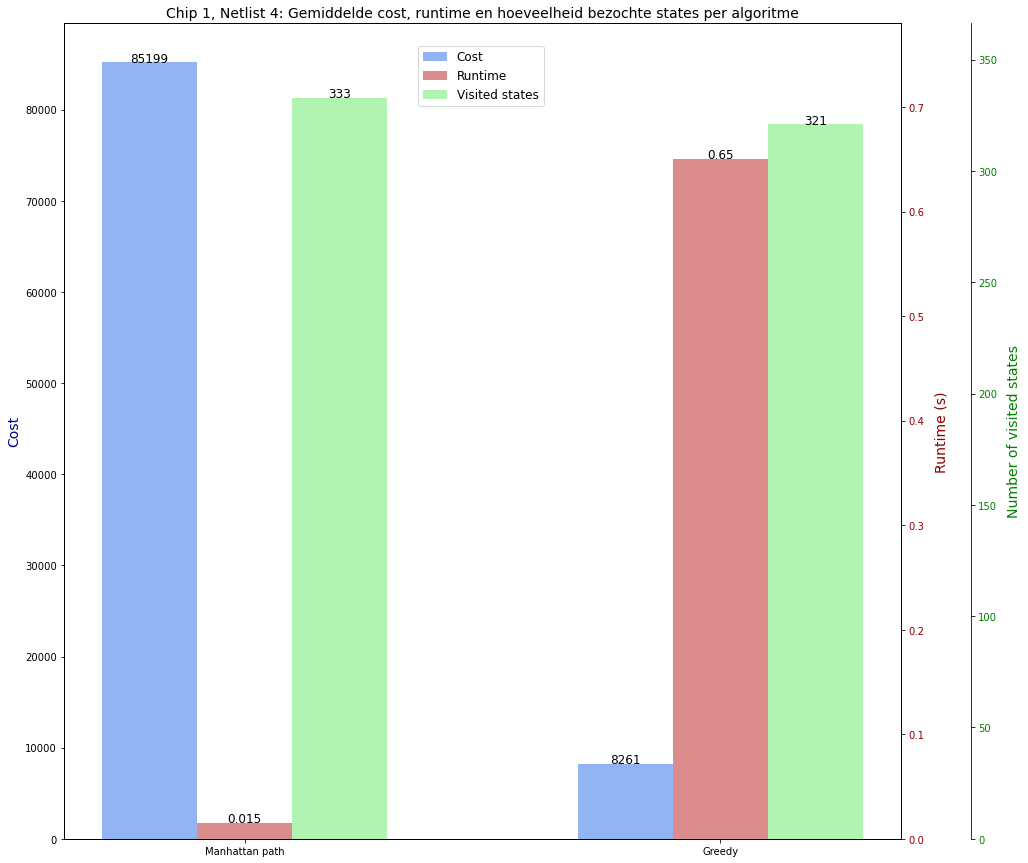

In [188]:
# Data
algorithms = ['Manhattan path', 'Greedy']
cost = [manhattan_nl4_cost, greedy_nl4_cost]
runtime = [round(np.mean(manhattan_nl4_runtimes), 3), round(np.mean(greedy_nl4_runtimes), 3)]
visited_states = [manhattan_nl4_states, greedy_nl4_states]

bar_width = 0.2

# Bereken x-as posities voor de bars
x = np.arange(len(algorithms))

fig, ax1 = plt.subplots(figsize=(15, 15))

# Voeg de cost staaf toe
bar1 = ax1.bar(x - bar_width, cost, width=bar_width, color='cornflowerblue', alpha=0.7)

# Voeg de cost y-as toe
ax1.set_ylabel('Cost', color='darkblue', fontsize=14)

# Voeg een tweede y-as toe
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (s)', color='darkred', fontsize=14, labelpad=10)
ax2.tick_params(axis='y', labelcolor='darkred')  # Set tick color for ax2

# Voeg de runtime staaf toe
bar2 = ax2.bar(x, runtime, width=bar_width, color='indianred', alpha=0.7)


# Maak ax3 naast ax2
ax3 = ax2.twinx()
ax3.spines['right'].set_position(('outward', 70))
ax3.set_ylabel('Number of visited states', color='green', fontsize=14, labelpad=10)
ax3.tick_params(axis='y', labelcolor='green')  # Set tick color for ax2

# Voeg de bezochte states data staaf toe
bar3 = ax3.bar(x + bar_width, visited_states, width=bar_width, color='lightgreen', alpha=0.7)

# Verberg de y-ticks en labels van ax3
#ax3.yaxis.set_ticks([])

# Verplaats de runtime y-ticks naar rechts
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

# Pas de y-as limieten van ax3 aan
ax2.set_ylim(0, max(runtime) * 1.2)  # Adjust the limit to show the bars
ax3.set_ylim(0, max(visited_states) * 1.1)  # Adjust the limit to show the bars

# Voeg de x-as ticks en labels toe
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)


# Schrijf de cost waardes boven de staven
for i, value in enumerate(cost):
    ax1.text(i - bar_width, value + 0.4, str(value), ha="center", fontsize=12)

# Schrijf de runtime waardes boven de staven
for i, value in enumerate(runtime):
    ax2.text(i, value + 0.001, str(value), ha="center", fontsize=12)
    
# Schrijf de visited states waardes boven de staven
for i, value in enumerate(visited_states):
    ax3.text(i + bar_width, value + 0.001, str(value), ha="center", fontsize=12)

    
# Voeg een titel en legenda toe
plt.title('Chip 1, Netlist 4: Gemiddelde cost, runtime en hoeveelheid bezochte states per algoritme', fontsize=14)
ax1.legend([bar1, bar2, bar3], ['Cost', 'Runtime', 'Visited states'], bbox_to_anchor=[0.58, 0.98], fontsize = 12)

plt.show()

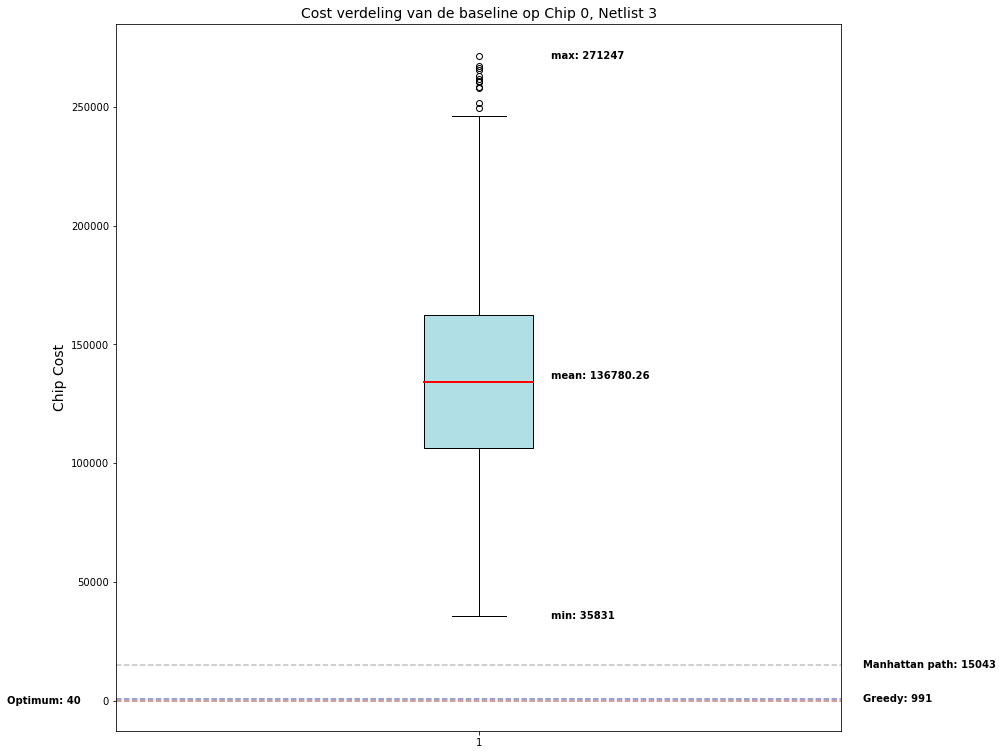

In [189]:
import numpy as np
import matplotlib.pyplot as plt

data = random_nl3_costs

# Maak de boxplots
fig = plt.figure(figsize=(13, 13))

# Eerste boxplot met data
box1 = plt.boxplot(data, positions=[1], patch_artist=True, boxprops=dict(facecolor='powderblue'), medianprops=dict(linewidth=2, color='red'))

# Bereken de relevante statistieken voor data en data2
stats1 = {'min': np.min(data), 'max': np.max(data), 'mean': round(np.mean(data), 2)}

# Voeg text annotaties toe voor de statistieken van data
for stat, value in stats1.items():
    plt.text(1.1, value, f'{stat}: {value}', va='center', fontweight='bold')



# Toon manhattan path,greedy en optimum waardes met een horizontale lijn
plt.axhline(y=manhattan_nl3_cost, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=greedy_nl3_cost, color='darkblue', linestyle='--', alpha=0.5)
plt.axhline(y=40, color='darkred', linestyle='--', alpha=0.5)


# Voeg een tekstlabel toe voor de Manhattan path, greedy en het optimum
plt.text(1.53, 15000, f'Manhattan path: {manhattan_nl3_cost}', va='center', fontweight='bold')
plt.text(1.53, greedy_nl3_cost, f'Greedy: {greedy_nl3_cost}', va='center', fontweight='bold')
plt.text(0.35, 40, 'Optimum: 40', va='center', fontweight='bold')


# Voeg een titel en labels toe aan de boxplots
plt.title('Cost verdeling van de baseline op Chip 0, Netlist 3', fontsize=14)
plt.ylabel('Chip Cost', fontsize=14)


# Maak de plot
plt.show()

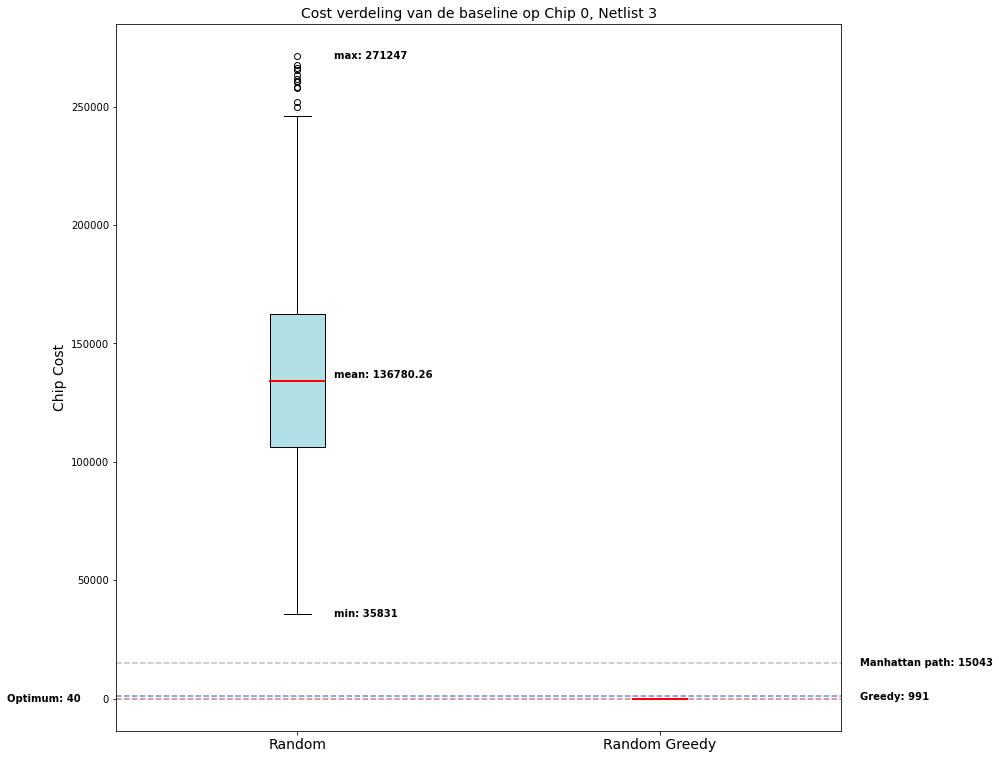

In [190]:
import numpy as np
import matplotlib.pyplot as plt

data = random_nl3_costs
data2 = r_greedy_nl3_costs

# Maak de boxplots
fig = plt.figure(figsize=(13, 13))

# Eerste boxplot met data
box1 = plt.boxplot(data, positions=[1], patch_artist=True, boxprops=dict(facecolor='powderblue'), medianprops=dict(linewidth=2, color='red'))

# Tweede boxplot met data2
box2 = plt.boxplot(data2, positions=[2], patch_artist=True, boxprops=dict(facecolor='palegreen'), medianprops=dict(linewidth=2, color='red'))

# Bereken de relevante statistieken voor data en data2
stats1 = {'min': np.min(data), 'max': np.max(data), 'mean': round(np.mean(data), 2)}

# Voeg text annotaties toe voor de statistieken van data
for stat, value in stats1.items():
    plt.text(1.1, value, f'{stat}: {value}', va='center', fontweight='bold')


# Toon manhattan path,greedy en optimum waardes met een horizontale lijn
plt.axhline(y=manhattan_nl3_cost, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=greedy_nl3_cost, color='darkblue', linestyle='--', alpha=0.5)
plt.axhline(y=40, color='darkred', linestyle='--', alpha=0.5)


# Voeg een tekstlabel toe voor de Manhattan path, greedy en het optimum
plt.text(2.55, manhattan_nl3_cost, f'Manhattan path: {manhattan_nl3_cost}', va='center', fontweight='bold')
plt.text(2.55, greedy_nl3_cost, f'Greedy: {greedy_nl3_cost}', va='center', fontweight='bold')
plt.text(0.20, 40, 'Optimum: 40', va='center', fontweight='bold')


# Voeg een titel en labels toe aan de boxplots
plt.title('Cost verdeling van de baseline op Chip 0, Netlist 3', fontsize=14)
plt.ylabel('Chip Cost', fontsize=14)

# Voeg de xtick labels toe
plt.xticks([1, 2], ['Random', 'Random Greedy'], fontsize=14)

# Maak de plot
plt.show()

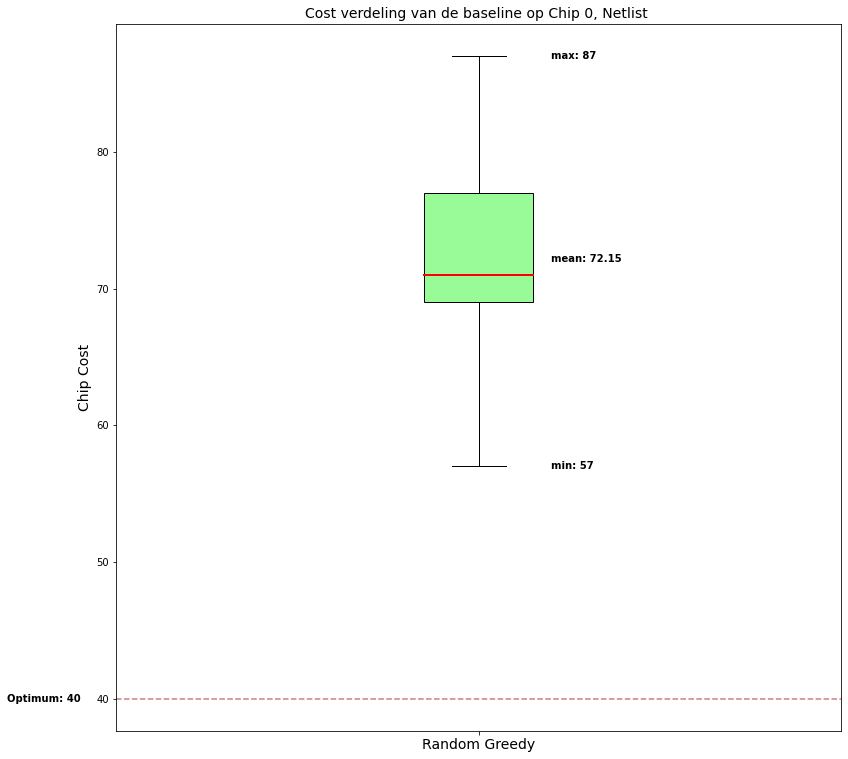

In [191]:
import numpy as np
import matplotlib.pyplot as plt

data = r_greedy_nl3_costs

# Maak de boxplots
fig = plt.figure(figsize=(13, 13))

# Eerste boxplot met data
box1 = plt.boxplot(data, positions=[1], patch_artist=True, boxprops=dict(facecolor='palegreen'), medianprops=dict(linewidth=2, color='red'))

# Bereken de relevante statistieken voor data en data2
stats1 = {'min': np.min(data), 'max': np.max(data), 'mean': round(np.mean(data), 2)}

# Voeg text annotaties toe voor de statistieken van data
for stat, value in stats1.items():
    plt.text(1.1, value, f'{stat}: {value}', va='center', fontweight='bold')



# Toon manhattan path,greedy en optimum waardes met een horizontale lijn
#plt.axhline(y=manhattan_nl3_cost, color='gray', linestyle='--', alpha=0.5)
#plt.axhline(y=greedy_nl3_cost, color='darkblue', linestyle='--', alpha=0.5)
plt.axhline(y=40, color='darkred', linestyle='--', alpha=0.5)


# Voeg een tekstlabel toe voor de Manhattan path, greedy en het optimum
#plt.text(1.53, 15000, f'Manhattan path: {manhattan_nl3_cost}', va='center', fontweight='bold')
#plt.text(1.53, 28, f'Greedy: {greedy_nl3_cost}', va='center', fontweight='bold')
plt.text(0.35, 40, 'Optimum: 40', va='center', fontweight='bold')


# Voeg een titel en labels toe aan de boxplots
plt.title('Cost verdeling van de baseline op Chip 0, Netlist ', fontsize=14)
plt.ylabel('Chip Cost', fontsize=14)

plt.xticks([1], ['Random Greedy'], fontsize=14)

# Maak de plot
plt.show()